# Data-centric-model

#### Download data 

The purpose of this lab is to make a data-centric solutions

first of all. We have to download the datasets 

In [1]:
!wget https://storage.googleapis.com/mlep-public/course_1/week2/kagglecatsanddogs_3367a.zip

--2024-07-02 23:21:09--  https://storage.googleapis.com/mlep-public/course_1/week2/kagglecatsanddogs_3367a.zip
Résolution de storage.googleapis.com (storage.googleapis.com)… 2a00:1450:4006:804::201b, 2a00:1450:4006:808::201b, 2a00:1450:4006:809::201b, ...
Connexion à storage.googleapis.com (storage.googleapis.com)|2a00:1450:4006:804::201b|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 824894548 (787M) [application/zip]
Enregistre : ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786,68M  8,07MB/s    ds 2m 4s   

2024-07-02 23:23:14 (6,34 MB/s) - ‘kagglecatsanddogs_3367a.zip’ enregistré [824894548/824894548]



In [2]:
!wget https://storage.googleapis.com/mlep-public/course_1/week2/CUB_200_2011.tar

--2024-07-02 23:37:09--  https://storage.googleapis.com/mlep-public/course_1/week2/CUB_200_2011.tar
Résolution de storage.googleapis.com (storage.googleapis.com)… 2a00:1450:4006:80f::201b, 2a00:1450:4006:80e::201b, 2a00:1450:4006:80c::201b, ...
Connexion à storage.googleapis.com (storage.googleapis.com)|2a00:1450:4006:80f::201b|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1259479040 (1,2G) [application/x-tar]
Enregistre : ‘CUB_200_2011.tar’

CUB_200_2011.tar    100%[===================>]   1,17G  5,95MB/s    ds 3m 18s  

2024-07-02 23:40:28 (6,06 MB/s) - ‘CUB_200_2011.tar’ enregistré [1259479040/1259479040]



In [2]:
import os
import math
import shutil
import random
import zipfile
import tarfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

2024-07-04 00:58:39.828325: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 00:58:39.839514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 00:58:39.856814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 00:58:39.856845: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 00:58:39.868148: I tensorflow/core/platform/cpu_feature_gua

### Load and extract data

In [4]:
cats_and_dogs_zip = './kagglecatsanddogs_3367a.zip'
caltech_birds_tar = './CUB_200_2011.tar'

base_dir = '/tmp/data'

In [3]:
with zipfile.ZipFile(cats_and_dogs_zip, 'r') as my_zip:
    my_zip.extractall(base_dir)

with tarfile.open(caltech_birds_tar, 'r') as my_tar:
    my_tar.extractall(base_dir)

In [5]:
base_dogs_dir = os.path.join(base_dir, 'PetImages/Dog')
base_cats_dir = os.path.join(base_dir,'PetImages/Cat')

print(f"There are {len(os.listdir(base_dogs_dir))} images of dogs")
print(f"There are {len(os.listdir(base_cats_dir))} images of cats")

There are 12501 images of dogs
There are 12501 images of cats


In [7]:
raw_birds_dir = "/tmp/data/CUB_200_2011/images"
base_birds_dir = os.path.join(base_dir, 'PetImages/Bird')
os.mkdir(base_birds_dir)
for subdir in os.listdir(raw_birds_dir):
    sub_dir_path = os.path.join(raw_birds_dir, subdir)
    for image in os.listdir(sub_dir_path):
        shutil.move(os.path.join(sub_dir_path, image), os.path.join(base_birds_dir, image))

print(f"There are {len(os.listdir(base_birds_dir))} images of birds")


There are 11788 images of birds


#### Display some examples

Sample cat image:


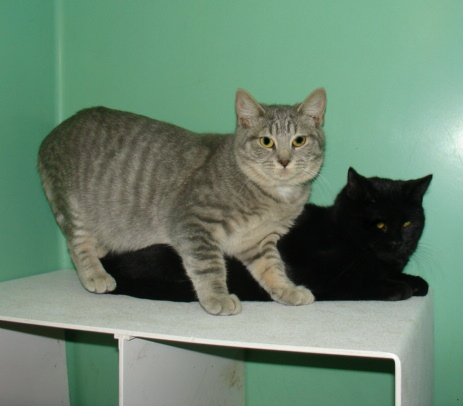


Sample dog image:


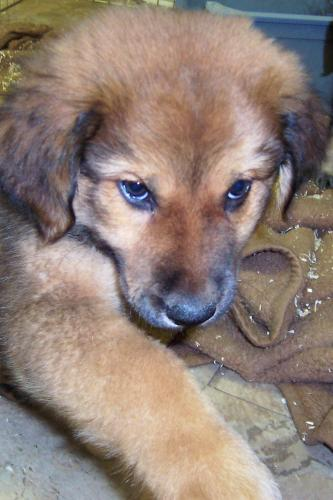


Sample bird image:


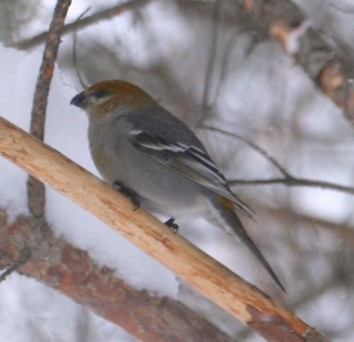

In [8]:
from IPython.display import Image, display

print("Sample cat image:")
display(Image(filename=f"{os.path.join(base_cats_dir, os.listdir(base_cats_dir)[0])}"))
print("\nSample dog image:")
display(Image(filename=f"{os.path.join(base_dogs_dir, os.listdir(base_dogs_dir)[0])}"))
print("\nSample bird image:")
display(Image(filename=f"{os.path.join(base_birds_dir, os.listdir(base_birds_dir)[0])}"))

### Split data in train/eval 

In [9]:

train_eval_dirs = ['train/cats', 'train/dogs', 'train/birds',
                   'eval/cats', 'eval/dogs', 'eval/birds']

for dir in train_eval_dirs:
  if not os.path.exists(os.path.join(base_dir, dir)):
    os.makedirs(os.path.join(base_dir, dir))

In [10]:

def move_to_destination(origin, destination, percentage_split):
  num_images = int(len(os.listdir(origin))*percentage_split)
  for image_name, image_number in zip(sorted(os.listdir(origin)), range(num_images)):
    shutil.move(os.path.join(origin, image_name), destination)

In [11]:

# Move 70% of the images to the train dir
move_to_destination(base_cats_dir, os.path.join(base_dir, 'train/cats'), 0.7)
move_to_destination(base_dogs_dir, os.path.join(base_dir, 'train/dogs'), 0.7)
move_to_destination(base_birds_dir, os.path.join(base_dir, 'train/birds'), 0.7)


# Move the remaining images to the eval dir
move_to_destination(base_cats_dir, os.path.join(base_dir, 'eval/cats'), 1)
move_to_destination(base_dogs_dir, os.path.join(base_dir, 'eval/dogs'), 1)
move_to_destination(base_birds_dir, os.path.join(base_dir, 'eval/birds'), 1)

In [12]:
!find /tmp/data/ -size 0 -exec rm {} +
!find /tmp/data/ -type f ! -name "*.jpg" -exec rm {} +

In [13]:
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/cats')))} images of cats for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/dogs')))} images of dogs for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/birds')))} images of birds for training\n")

print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/cats')))} images of cats for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/dogs')))} images of dogs for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/birds')))} images of birds for evaluation")

There are 8750 images of cats for training
There are 8749 images of dogs for training
There are 8251 images of birds for training

There are 3749 images of cats for evaluation
There are 3750 images of dogs for evaluation
There are 3537 images of birds for evaluation


### Create imbalanced dataset 

In [25]:
for dir in train_eval_dirs:
  if not os.path.exists(os.path.join(base_dir, 'imbalanced/'+dir)):
    os.makedirs(os.path.join(base_dir, 'imbalanced/'+dir))

In [26]:
# Very similar to the one used before but this one copies instead of moving
def copy_with_limit(origin, destination, percentage_split):
  num_images = int(len(os.listdir(origin))*percentage_split)
  for image_name, image_number in zip(sorted(os.listdir(origin)), range(num_images)):
    shutil.copy(os.path.join(origin, image_name), destination)

# Perform the copying
copy_with_limit(os.path.join(base_dir, 'train/cats'), os.path.join(base_dir, 'imbalanced/train/cats'), 1)
copy_with_limit(os.path.join(base_dir, 'train/dogs'), os.path.join(base_dir, 'imbalanced/train/dogs'), 0.2)
copy_with_limit(os.path.join(base_dir, 'train/birds'), os.path.join(base_dir, 'imbalanced/train/birds'), 0.1)

copy_with_limit(os.path.join(base_dir, 'eval/cats'), os.path.join(base_dir, 'imbalanced/eval/cats'), 1)
copy_with_limit(os.path.join(base_dir, 'eval/dogs'), os.path.join(base_dir, 'imbalanced/eval/dogs'), 0.2)
copy_with_limit(os.path.join(base_dir, 'eval/birds'), os.path.join(base_dir, 'imbalanced/eval/birds'), 0.1)

# Print number of available images
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/train/cats')))} images of cats for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/train/dogs')))} images of dogs for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/train/birds')))} images of birds for training\n")

print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/eval/cats')))} images of cats for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/eval/dogs')))} images of dogs for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'imbalanced/eval/birds')))} images of birds for evaluation")

There are 8750 images of cats for training
There are 1749 images of dogs for training
There are 825 images of birds for training

There are 3749 images of cats for evaluation
There are 750 images of dogs for evaluation
There are 353 images of birds for evaluation


### Selecting a model

We are going to make a basic Convolutional neural network (CNN) with tensorflow

In [18]:
from tensorflow.keras import layers, models, optimizers

def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(3, activation='softmax')

    ])
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = optimizers.Adam(),
        metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    return model 


In [20]:
imbalance_model = create_model()
print(imbalance_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,931 (6.49 MB)

 Trainable params: 1,700,931 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

None


#### Load data with generator

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/tmp/data/imbalanced/train",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

valid_generator = test_datagen.flow_from_directory(
    "/tmp/data/imbalanced/eval",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

Found 11324 images belonging to 3 classes.
Found 4852 images belonging to 3 classes.


In [29]:
print(f"labels for each class in the train generator are: {train_generator.class_indices}")
print(f"labels for each class in the validation generator are: {valid_generator.class_indices}")

labels for each class in the train generator are: {'birds': 0, 'cats': 1, 'dogs': 2}
labels for each class in the validation generator are: {'birds': 0, 'cats': 1, 'dogs': 2}


### Train the model

In [35]:
import math
### We train only on 10 epoch for the analysis
imbalanced_history = imbalance_model.fit(train_generator, epochs=10, 
                                         steps_per_epoch=math.ceil(train_generator.samples//32),
                                         validation_data=valid_generator, validation_steps=math.ceil(valid_generator.samples//32))

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9906 - val_loss: 0.8180 - val_sparse_categorical_accuracy: 0.8249
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - loss: 0.0374 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5524 - val_sparse_categorical_accuracy: 0.6000
Epoch 3/10


2024-07-04 13:32:24.852466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-04 13:32:24.897114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


353/353 ━━━━━━━━━━━━━━━━━━━━ 82s 233ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.9849 - val_sparse_categorical_accuracy: 0.8514
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - loss: 0.0380 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.8115 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/10


2024-07-04 13:33:47.500875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-04 13:33:47.543281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


353/353 ━━━━━━━━━━━━━━━━━━━━ 90s 253ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9892 - val_loss: 0.9432 - val_sparse_categorical_accuracy: 0.8094
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - loss: 0.0346 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0853 - val_sparse_categorical_accuracy: 0.8000
Epoch 7/10


2024-07-04 13:35:17.378081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-04 13:35:17.431987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


353/353 ━━━━━━━━━━━━━━━━━━━━ 87s 245ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.8989 - val_sparse_categorical_accuracy: 0.8411
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 146us/step - loss: 0.0040 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5187 - val_sparse_categorical_accuracy: 0.7000
Epoch 9/10


2024-07-04 13:36:44.735944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-04 13:36:44.777227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


353/353 ━━━━━━━━━━━━━━━━━━━━ 85s 241ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9881 - val_loss: 1.0842 - val_sparse_categorical_accuracy: 0.8386
Epoch 10/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.9440 - val_sparse_categorical_accuracy: 0.9000


2024-07-04 13:38:10.471385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-04 13:38:10.523028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [38]:
def get_trainings_metics(history):

    if not isinstance(history, pd.core.frame.DataFrame):
        history = history.history 

    acc = history["sparse_categorical_accuracy"]
    val_acc = history["val_sparse_categorical_accuracy"]

    loss = history["loss"]
    val_loss = history["val_loss"]

    return acc, val_acc, loss, val_loss

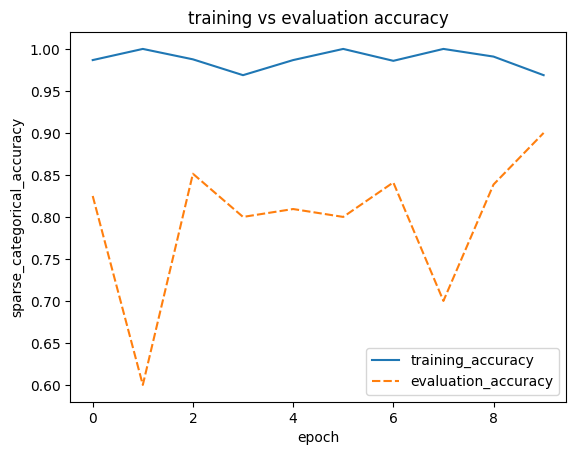

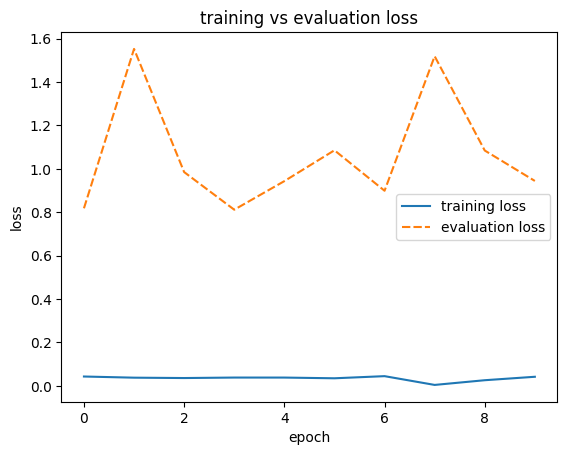

In [39]:
def plot_train_eval(history):
    acc, val_acc, loss, val_loss  = get_trainings_metics(history)
    acc_plot = pd.DataFrame({"training_accuracy": acc, "evaluation_accuracy": val_acc})
    acc_plot = sns.lineplot(data=acc_plot)
    acc_plot.set_title('training vs evaluation accuracy')
    acc_plot.set_xlabel('epoch')
    acc_plot.set_ylabel('sparse_categorical_accuracy')
    plt.show()

    print("")

    loss_plot = pd.DataFrame({"training loss":loss, "evaluation loss":val_loss})
    loss_plot = sns.lineplot(data=loss_plot)
    loss_plot.set_title('training vs evaluation loss')
    loss_plot.set_xlabel('epoch')
    loss_plot.set_ylabel('loss')
    plt.show()



plot_train_eval(imbalanced_history)


We can see in the various accuracy and error plots the significant gap between the results on the training set and the test set.

For the training loss, we have a very low value, approximately 0.1, while for the evaluation loss, we have a very high value. This clearly indicates that the model is overfitting the training data.

#### Evaluate the model on the imbalanced eval dataset

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score

val_gen_no_shuffle = test_datagen.flow_from_directory(
    '/tmp/data/imbalanced/eval',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 4852 images belonging to 3 classes.


In [42]:
# Get the true labels from the generator
y_true = val_gen_no_shuffle.classes

# Use the model to predict (will take a couple of minutes)
predictions_imbalanced = imbalance_model.predict(val_gen_no_shuffle)

# Get the argmax (since softmax is being used)
y_pred_imbalanced = np.argmax(predictions_imbalanced, axis=1)

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_true, y_pred_imbalanced)}")

# Print balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred_imbalanced)}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step
Accuracy Score: 0.8415086562242374
Balanced Accuracy Score: 0.7169742849483396


Here Balanced accuracy represent the average of the accuracy on each class. The class imbalanced is also visible on the accuracy.

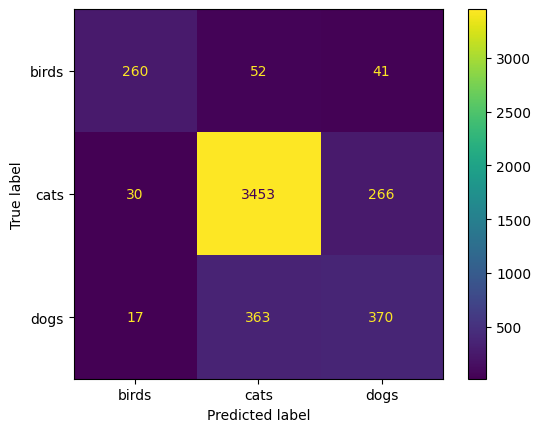

In [43]:
imbalanced_cm = confusion_matrix(y_true, y_pred_imbalanced)
ConfusionMatrixDisplay(imbalanced_cm, display_labels=['birds', 'cats', 'dogs']).plot(values_format="d")

In [44]:
misclassified_birds = (imbalanced_cm[1,0] + imbalanced_cm[2,0])/np.sum(imbalanced_cm, axis=0)[0]
misclassified_cats = (imbalanced_cm[0,1] + imbalanced_cm[2,1])/np.sum(imbalanced_cm, axis=0)[1]
misclassified_dogs = (imbalanced_cm[0,2] + imbalanced_cm[1,2])/np.sum(imbalanced_cm, axis=0)[2]

print(f"Proportion of misclassified birds: {misclassified_birds*100:.2f}%")
print(f"Proportion of misclassified cats: {misclassified_cats*100:.2f}%")
print(f"Proportion of misclassified dogs: {misclassified_dogs*100:.2f}%")

Proportion of misclassified birds: 15.31%
Proportion of misclassified cats: 10.73%
Proportion of misclassified dogs: 45.35%


In [45]:
# Predict cat for all images
all_cats = np.ones(y_true.shape)

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_true, all_cats)}")

# Print balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, all_cats)}")

Accuracy Score: 0.7726710634789777
Balanced Accuracy Score: 0.3333333333333333


Found 11036 images belonging to 3 classes.
345/345 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step


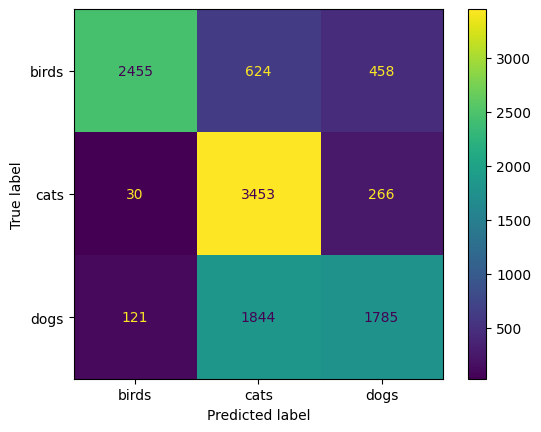

In [46]:
# Use the validation generator without shuffle to easily compute additional metrics
val_gen_no_shuffle = test_datagen.flow_from_directory(
    '/tmp/data/eval',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

# Get the true labels from the generator
y_true = val_gen_no_shuffle.classes

# Use the model to predict (will take a couple of minutes)
predictions_imbalanced = imbalance_model.predict(val_gen_no_shuffle)

# Get the argmax (since softmax is being used)
y_pred_imbalanced = np.argmax(predictions_imbalanced, axis=1)

# Confusion matrix
imbalanced_cm = confusion_matrix(y_true, y_pred_imbalanced)
ConfusionMatrixDisplay(imbalanced_cm, display_labels=['birds', 'cats', 'dogs']).plot(values_format="d")

# Conclusion
---
Imbalanced data can reduce the performance of a model. Maybe we can have good accuracy on train dataset (overfitting). So it's important to test our model on new data. 


To resolve imbalanced problem, We can make add data by doing Data Augmentaion on the current data